# import 包

In [37]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

def show(img_tensor, title=None):
    # 将torch.Tensor可视化
    img = transforms.ToPILImage()(img_tensor)
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.show()

# 数据加载

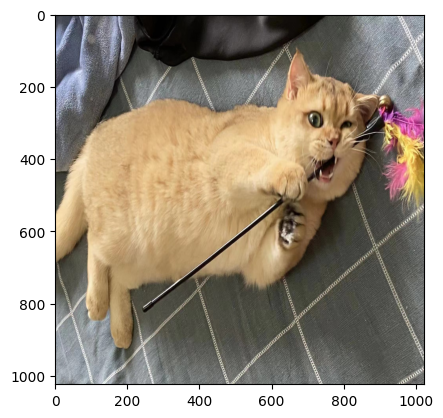

In [28]:
img = Image.open('test.png')
img = transforms.ToTensor()(img)
show(img)

# 标准化

In [33]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]
normalize = transforms.Normalize(norm_mean, norm_std)
img_norm = normalize(img)
print(img)
print(img_norm)

tensor([[[0.2510, 0.2549, 0.2431,  ..., 0.6980, 0.6549, 0.6980],
         [0.2510, 0.2510, 0.2471,  ..., 0.7412, 0.6745, 0.6314],
         [0.2549, 0.2471, 0.2471,  ..., 0.6863, 0.6745, 0.5961],
         ...,
         [0.6118, 0.5686, 0.6118,  ..., 0.4000, 0.4627, 0.4863],
         [0.6275, 0.5765, 0.6235,  ..., 0.4078, 0.4706, 0.4706],
         [0.6118, 0.6078, 0.6745,  ..., 0.4392, 0.4235, 0.4078]],

        [[0.2627, 0.2667, 0.2549,  ..., 0.7373, 0.6941, 0.7373],
         [0.2627, 0.2627, 0.2588,  ..., 0.7804, 0.7137, 0.6706],
         [0.2667, 0.2588, 0.2588,  ..., 0.7255, 0.7137, 0.6353],
         ...,
         [0.6392, 0.5961, 0.6353,  ..., 0.4078, 0.4706, 0.4941],
         [0.6549, 0.6039, 0.6510,  ..., 0.4078, 0.4784, 0.4745],
         [0.6392, 0.6353, 0.7020,  ..., 0.4431, 0.4314, 0.4039]],

        [[0.2902, 0.2941, 0.2824,  ..., 0.7725, 0.7294, 0.7725],
         [0.2902, 0.2902, 0.2863,  ..., 0.8157, 0.7490, 0.7059],
         [0.2941, 0.2863, 0.2863,  ..., 0.7608, 0.7490, 0.

# Flip、Rotation

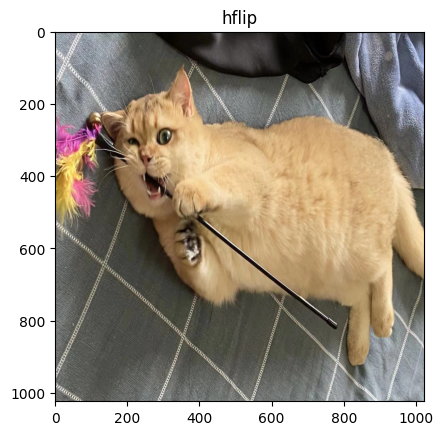

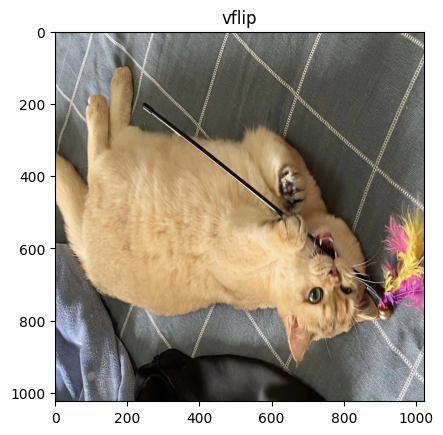

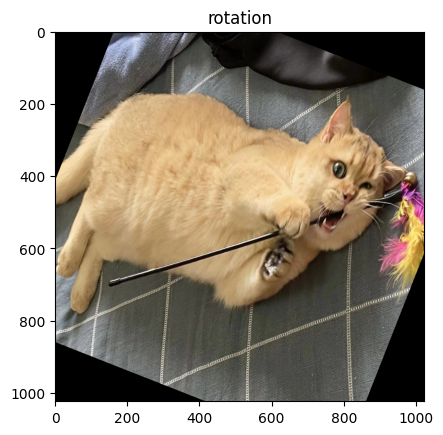

In [40]:
hflip = transforms.RandomHorizontalFlip(p=1)
vflip = transforms.RandomVerticalFlip(p=1)
rot = transforms.RandomRotation(degrees=(-180,180))
img_hflip = hflip(img)
img_vflip = vflip(img)
img_rot = rot(img)
show(img_hflip, 'hflip')
show(img_vflip, 'vflip')
show(img_rot, 'rotation')

# Crop

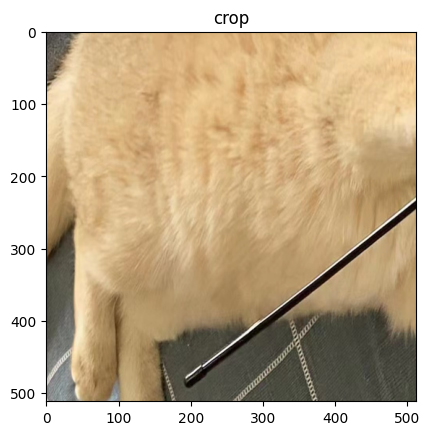

In [45]:
crop = transforms.RandomCrop(size=(512,512))
img_crop = crop(img)
show(img_crop, 'crop')

# Mixup

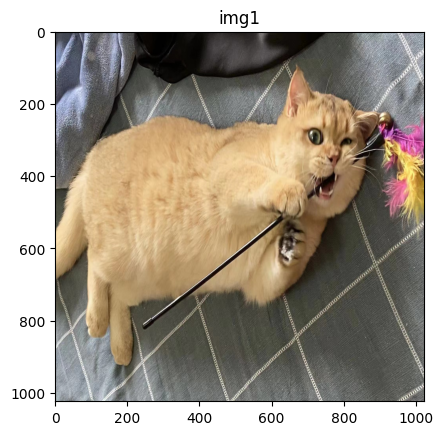

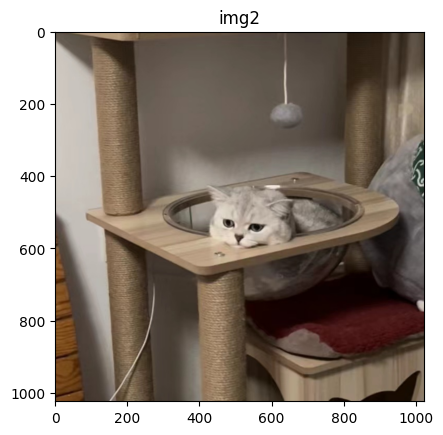

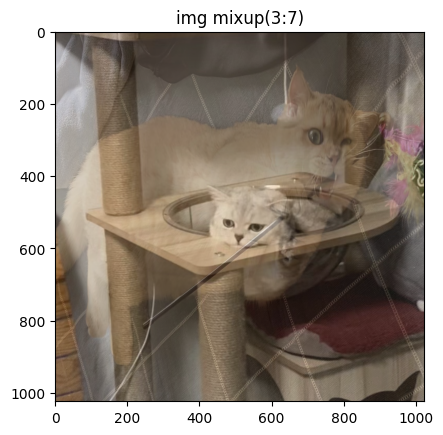

label 1: tensor([1., 0.])
label 2: tensor([0., 1.])
mix up label: tensor([0.3000, 0.7000])


In [58]:
import torch
import numpy as np
def mixup_data(x, y, lam=0.5):
    mixed_x = lam * x[0] + (1 - lam) * x[1]
    mixed_y = lam * y[0] + (1 - lam) * y[1]
    return mixed_x, mixed_y



img2 = Image.open('test2.png')
img2 = transforms.ToTensor()(img2)
show(img, 'img1')
show(img2, 'img2')
y1 = torch.Tensor([1,0])
y2 = torch.Tensor([0,1])
img_mixup,label_mixup = mixup_data((img,img2), (y1,y2), 0.3)
show(img_mixup, 'img mixup(3:7)')
print('label 1:', y1)
print('label 2:', y2)
print('mix up label:', label_mixup)

# Gaussian Noise

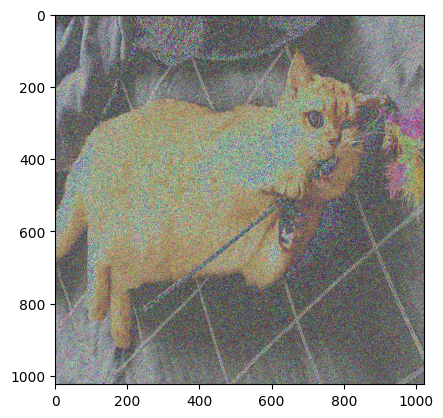

In [73]:
class GaussianNoise(object):
    def __init__(self, 
                mean=0.0, 
                std=1.0, 
                amplitude=0.2,
                p=1):
        self.mean = mean
        self.std = std
        self.amplitude = amplitude
        self.p=p
    def __call__(self, img):
        if torch.rand(1).item() < self.p:
            h, w, c = img.shape
            N = self.amplitude * torch.normal(mean=self.mean,
                    std=self.std, size=(h, w, c))
            img = N + img
            img[img > 255] = 255
            return img
        else:
            return img

gaussian = GaussianNoise()
img_gau = gaussian(img)
show(img_gau)

# 修改亮度、对比度和饱和度

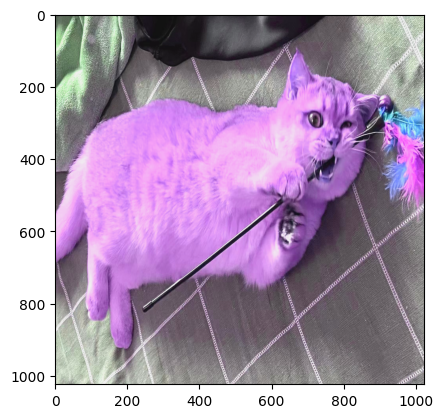

In [83]:
cj = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
img_cj = cj(img)
show(img_cj)